In [62]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input/"))

# Any results you write to the current directory are saved as output.

['in_time.csv', 'out_time.csv', 'general_data.csv', 'data_dictionary.xlsx', 'manager_survey_data.csv', 'employee_survey_data.csv']


In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [64]:
df = pd.read_csv("../input/general_data.csv",sep=",")

In [65]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4


In [66]:
print(df.columns)

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


## Data Cleaning:

In [67]:
df.isnull().any()

Age                        False
Attrition                  False
BusinessTravel             False
Department                 False
DistanceFromHome           False
Education                  False
EducationField             False
EmployeeCount              False
EmployeeID                 False
Gender                     False
JobLevel                   False
JobRole                    False
MaritalStatus              False
MonthlyIncome              False
NumCompaniesWorked          True
Over18                     False
PercentSalaryHike          False
StandardHours              False
StockOptionLevel           False
TotalWorkingYears           True
TrainingTimesLastYear      False
YearsAtCompany             False
YearsSinceLastPromotion    False
YearsWithCurrManager       False
dtype: bool

In [68]:
df.fillna(0,inplace=True)

In [69]:
#drop the useless columns:

df.drop(['EmployeeCount','EmployeeID','StandardHours'],axis=1, inplace = True)

## Data Visualization :

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

 ### Find the correlation b/w all the columns:

In [71]:
corr_cols = df[['Age','Attrition','BusinessTravel','DistanceFromHome','Education', 'EducationField','Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']]

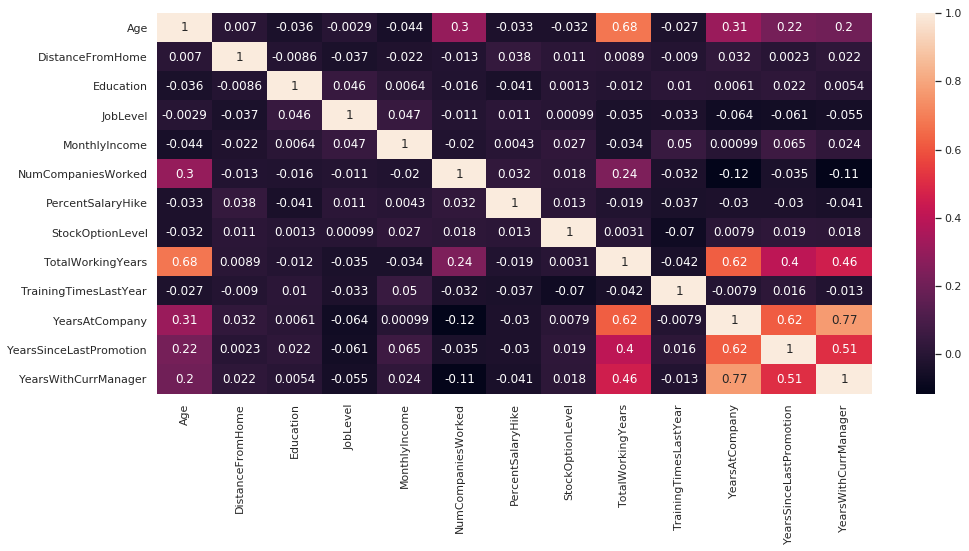

In [72]:
corr = corr_cols.corr()
plt.figure(figsize=(16,7))
sns.heatmap(corr,annot=True)
plt.show()

In [73]:
print(len(df))
print(len(df[df['Attrition']=='Yes']))
print(len(df[df['Attrition']=='No']))
print("percentage of yes Attrition is:",(len(df[df['Attrition']=='Yes'])/len(df))*100,"%")
print("percentage of no Attrition is:",(len(df[df['Attrition']=='No'])/len(df))*100,"%")

4410
711
3699
percentage of yes Attrition is: 16.122448979591837 %
percentage of no Attrition is: 83.87755102040816 %


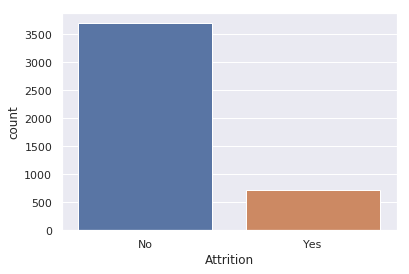

In [74]:
sns.countplot(x = "Attrition",data=df)
plt.show()

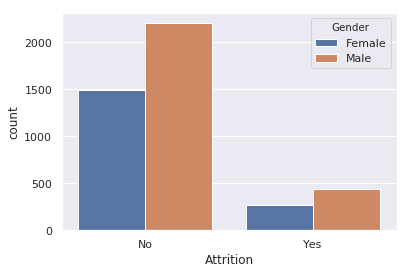

In [75]:
sns.countplot(x = "Attrition",data=df,hue="Gender")
plt.show()

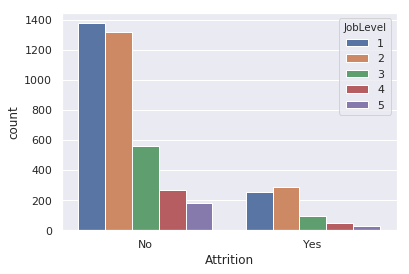

In [76]:
sns.countplot(x = "Attrition",data=df,hue="JobLevel")
plt.show()

In [77]:
#function to creat group of ages, this helps because we have 78 differente values here
def Age(dataframe):
    dataframe.loc[dataframe['Age'] <= 30,'Age'] = 1
    dataframe.loc[(dataframe['Age'] > 30) & (dataframe['Age'] <= 40), 'Age'] = 2
    dataframe.loc[(dataframe['Age'] > 40) & (dataframe['Age'] <= 50), 'Age'] = 3
    dataframe.loc[(dataframe['Age'] > 50) & (dataframe['Age'] <= 60), 'Age'] = 4
    return dataframe

Age(df); 

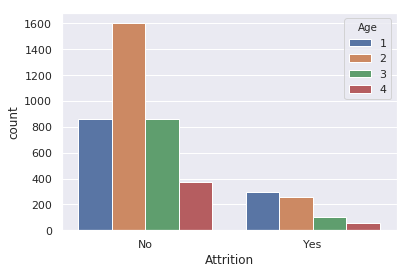

In [78]:
sns.countplot(x = "Attrition",data=df,hue="Age")
plt.show()

## Convert all the Categorical data into numerical data 

In [79]:
print(df['BusinessTravel'].unique())
print(df['Department'].unique())
print(df['EducationField'].unique())
print(df['Gender'].unique())
print(df['JobRole'].unique())
print(df['MaritalStatus'].unique())
print(df['Over18'].unique())

['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
['Sales' 'Research & Development' 'Human Resources']
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
['Female' 'Male']
['Healthcare Representative' 'Research Scientist' 'Sales Executive'
 'Human Resources' 'Research Director' 'Laboratory Technician'
 'Manufacturing Director' 'Sales Representative' 'Manager']
['Married' 'Single' 'Divorced']
['Y']


In [80]:
from sklearn.preprocessing import LabelEncoder
labelEncoder_X = LabelEncoder()
df['BusinessTravel'] = labelEncoder_X.fit_transform(df['BusinessTravel'])
df['Department'] = labelEncoder_X.fit_transform(df['Department'])
df['EducationField'] = labelEncoder_X.fit_transform(df['EducationField'])
df['Gender'] = labelEncoder_X.fit_transform(df['Gender'])
df['JobRole'] = labelEncoder_X.fit_transform(df['JobRole'])
df['MaritalStatus'] = labelEncoder_X.fit_transform(df['MaritalStatus'])
df['Over18'] = labelEncoder_X.fit_transform(df['Over18'])

In [81]:
#Attriton is dependent var
from sklearn.preprocessing import LabelEncoder
label_encoder_y=LabelEncoder()
df['Attrition']=label_encoder_y.fit_transform(df['Attrition'])

In [82]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,4,0,2,2,6,2,1,0,1,0,1,131160,1.0,0,11,0,1.0,6,1,0,0
1,2,1,1,1,10,1,1,0,1,6,2,41890,0.0,0,23,1,6.0,3,5,1,4
2,2,0,1,1,17,4,4,1,4,7,1,193280,1.0,0,15,3,5.0,2,5,0,3
3,2,0,0,1,2,5,1,1,3,1,1,83210,3.0,0,11,3,13.0,5,8,7,5
4,2,0,2,1,10,1,3,1,1,7,2,23420,4.0,0,12,2,9.0,2,6,0,4


In [83]:
corr_cols = df[['Age','Attrition','BusinessTravel','DistanceFromHome','Education', 'EducationField','Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']]

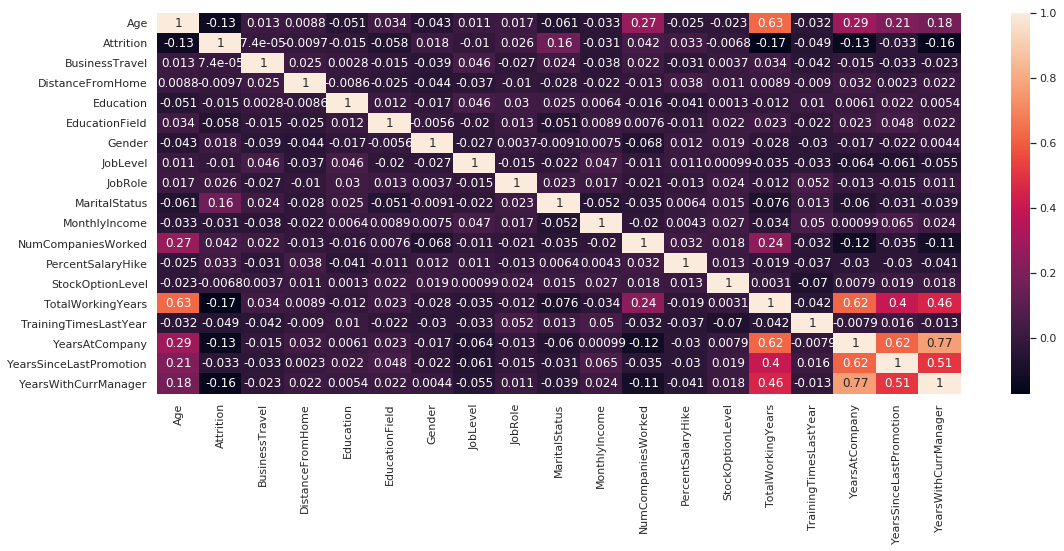

In [84]:
corr = corr_cols.corr()
plt.figure(figsize=(18,7))
sns.heatmap(corr, annot = True)
plt.show()

# Split data into training and Testing set:

### Choose dependent and independent var:
 here dependent var is **Attrition** and rest of the var are indepdent var.

In [85]:
y = df['Attrition']
x = df.drop('Attrition', axis = 1)

In [86]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state=42)

In [87]:
from sklearn.preprocessing import StandardScaler
Scaler_X = StandardScaler()
X_train = Scaler_X.fit_transform(X_train)
X_test = Scaler_X.transform(X_test)

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [88]:
#import some comman libs:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score

# Logistic Regression:

In [89]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))



0.8378684807256236
[[732   9]
 [134   7]]


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [90]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91       741
           1       0.44      0.05      0.09       141

   micro avg       0.84      0.84      0.84       882
   macro avg       0.64      0.52      0.50       882
weighted avg       0.78      0.84      0.78       882

